<a href="https://colab.research.google.com/github/Harishankarvel/LAUN_ML_project/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Determining Batsman's role- Aggressive,Radical,Defensive using kMeans

Dataset 'ODI data.csv' loaded successfully.

Analyzing 812 players with at least 30 matches.

Finding the optimal number of clusters using the Elbow Method...


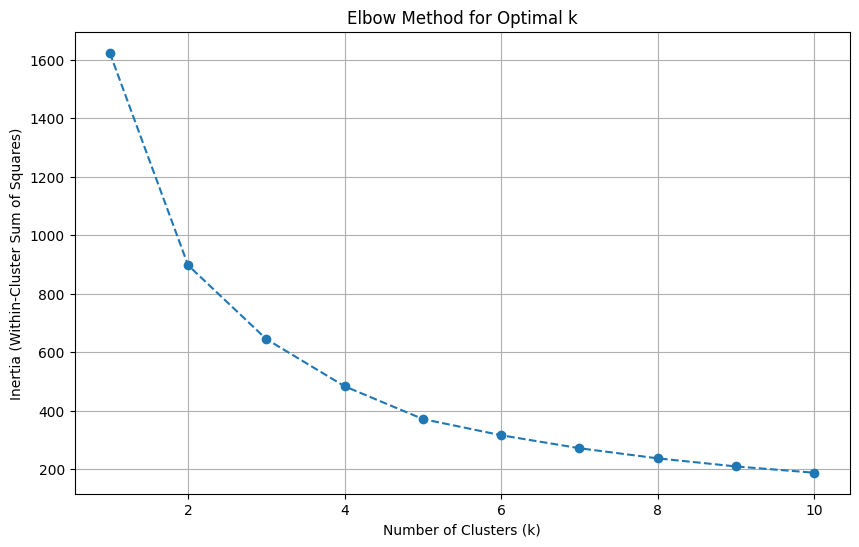

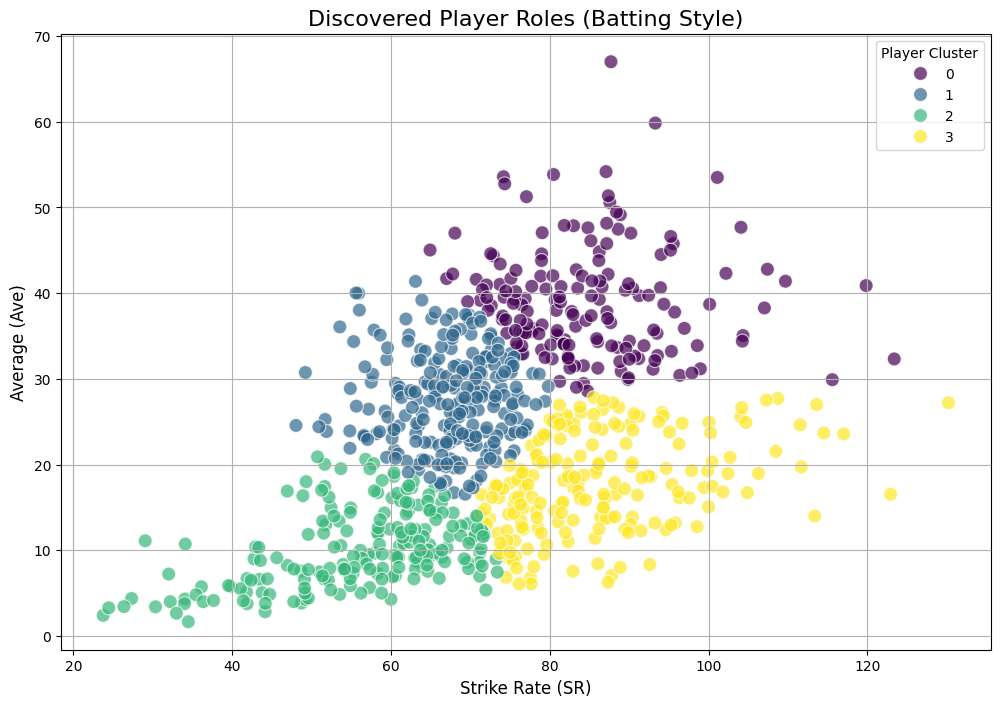


--- Analysis of Discovered Player Clusters ---
           Ave     SR  Player_Count
Cluster                            
0        39.00  84.71           166
1        27.49  67.39           247
2        10.24  56.12           199
3        17.75  85.97           200

--- How to Interpret These Clusters ---
Look at the 'Ave' (Average) and 'SR' (Strike Rate) for each cluster:
 - Cluster with High Ave, High SR: 'Elite Batsmen'
 - Cluster with High Ave, Low SR: 'Anchors / Accumulators'
 - Cluster with Low Ave, High SR: 'Aggressive Finishers / Pinch Hitters'
 - Cluster with Low Ave, Low SR: 'Lower Order / All-rounders'


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


try:

    player_stats = pd.read_csv('ODI data.csv', index_col=0)
    print("Dataset 'ODI data.csv' loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'ODI data.csv' not found. Please upload the file to your Colab session.")
    exit()


features_df = player_stats[['Player', 'Mat', 'Ave', 'SR']].copy()


features_df['Ave'] = pd.to_numeric(features_df['Ave'], errors='coerce')
features_df['SR'] = pd.to_numeric(features_df['SR'], errors='coerce')
features_df['Mat'] = pd.to_numeric(features_df['Mat'], errors='coerce')


features_df.dropna(subset=['Ave', 'SR', 'Mat'], inplace=True)


min_matches = 30
features_df = features_df[features_df['Mat'] >= min_matches].copy()

print(f"\nAnalyzing {len(features_df)} players with at least {min_matches} matches.")


features_for_scaling = features_df[['Ave', 'SR']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_scaling)


print("\nFinding the optimal number of clusters using the Elbow Method...")
inertia = []
k_range = range(1, 11)
for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()




optimal_k = 4


kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)



plt.figure(figsize=(12, 8))
sns.scatterplot(x='SR', y='Ave', hue='Cluster', data=features_df, palette='viridis', s=100, alpha=0.7)

plt.title('Discovered Player Roles (Batting Style)', fontsize=16)
plt.xlabel('Strike Rate (SR)', fontsize=12)
plt.ylabel('Average (Ave)', fontsize=12)
plt.legend(title='Player Cluster')
plt.grid(True)
plt.show()

# --- 6. Analyzing the Clusters ---
print("\n--- Analysis of Discovered Player Clusters ---")
# Calculate the average stats for each cluster
cluster_analysis = features_df.groupby('Cluster')[['Ave', 'SR']].mean().round(2)
cluster_analysis['Player_Count'] = features_df['Cluster'].value_counts()
print(cluster_analysis)

print("\n--- How to Interpret These Clusters ---")
print("Look at the 'Ave' (Average) and 'SR' (Strike Rate) for each cluster:")
print(" - Cluster with High Ave, High SR: 'Elite Batsmen'")
print(" - Cluster with High Ave, Low SR: 'Anchors / Accumulators'")
print(" - Cluster with Low Ave, High SR: 'Aggressive Finishers / Pinch Hitters'")
print(" - Cluster with Low Ave, Low SR: 'Lower Order / All-rounders'")